# Ноутбук с разведочным анализом данных по квартирам, сдающимся в аренду

### Установим и импортируем необходимые библиотеки

In [ ]:
!pip install numpy matplotlib seaborn -q

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [2]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 30)

#### Загрузим данные и посмотрим на них

In [46]:
data = pd.read_csv('/home/seppoku/ds_bootcamp/real_estate_rent/data/raw/_data.csv')
data.head()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


#### Удалим столбец 'Unnamed: 0'

In [47]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

#### Возьмем колонки до столбца 'ремонт' (так поделились) и назовем колонки по английски

In [48]:
df = data[['ID  объявления', 'Количество комнат', 'Тип', 'Метро', 'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны', 'Описание']]

In [49]:
df.columns = ['announcement_id', 'rooms', 'type', 'subway', 'adress', 'square', 'building', 'parking', 'price', 'contact_phone', 'description']

### Посмотрим признак rooms

In [52]:
df['rooms'].value_counts()
# оставим только количество комнат, если там пропуск, заменим на 'свободная'
df['rooms'] = df['rooms'].fillna('Свободная')
df['rooms'] = [i.split(', ')[0] for i in df['rooms']]


/tmp/ipykernel_22885/928274817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rooms'] = df['rooms'].fillna('Свободная')
/tmp/ipykernel_22885/928274817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rooms'] = [i.split(', ')[0] for i in df['rooms']]


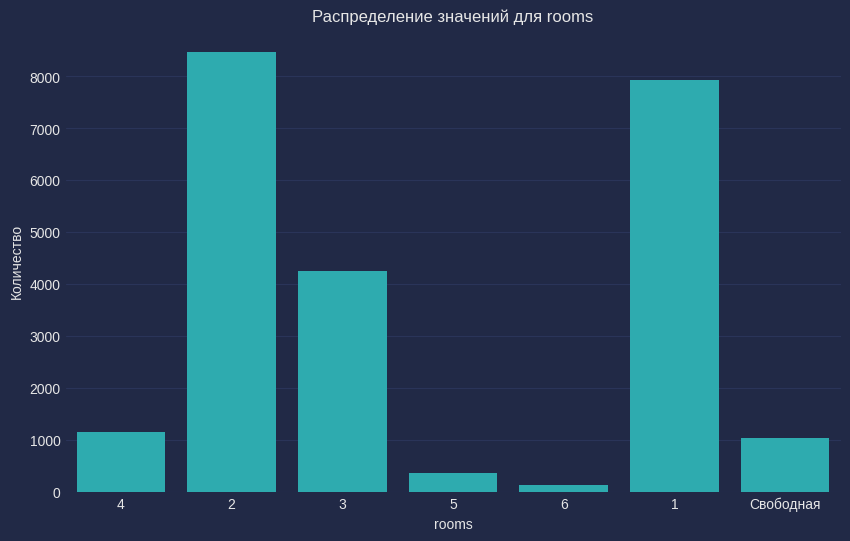

In [53]:
def plot_bar_chart(df, column_name):
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.countplot(data=df, x=column_name, ax=ax)

    ax.set_ylabel('Количество')
    ax.set_title(f'Распределение значений для {column_name}')


plot_bar_chart(df, 'rooms')

##### Видим, что чаще всего сдаются в аренду два пласта - **однушка** и **двушка**

### Посмотрим признак 'parking'

/tmp/ipykernel_22885/203028132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parking'] = df['parking'].fillna('во дворе')


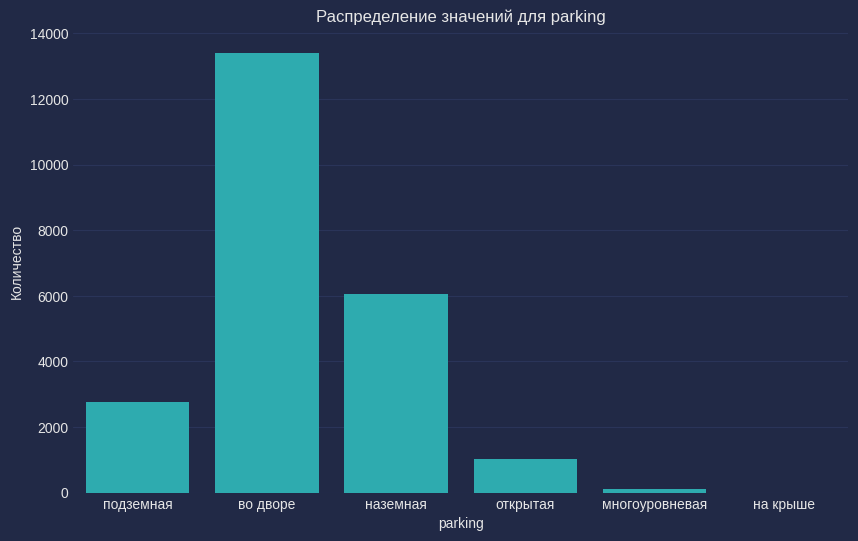

In [54]:
# заменим пропуски на 'во дворе'
df['parking'] = df['parking'].fillna('во дворе')
plot_bar_chart(df, 'parking')

##### Тут видим, что дома обычно не имеют отдельно построенных парковок, они в основном назменые - либо для **жильцов** либо для **всех кто захочет**

### Рассмотрим признак square

<Axes: xlabel='all_square', ylabel='Count'>

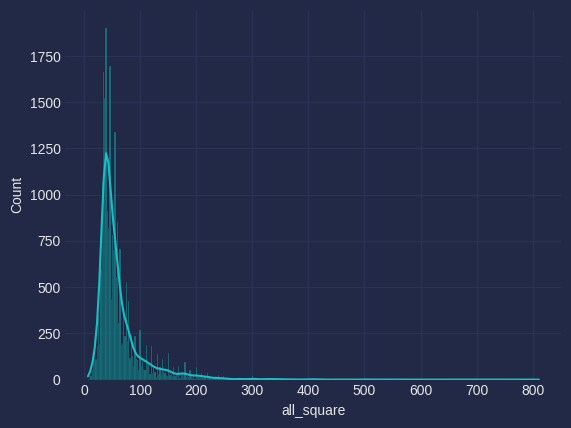

In [62]:
#сделаем новый столбец all_square, который будет в себя включать общую площадь квартиры
#df['all_square'] = [i.split('/')[0] for i in df['square']]
#df['all_square'] = df['all_square'].astype(float)
sns.histplot(df['all_square'], kde=True)

##### Мы можем видеть, что большинство квартир находятся в диапазоне от 40 до 70 метров квадратных


<Axes: ylabel='all_square'>

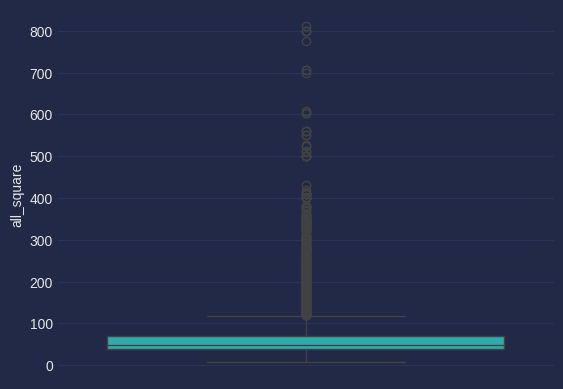

In [63]:
sns.boxplot(df['all_square'])

##### Медианное значение общей площади находится в районе 50, так же есть много квартир 150+ метров, это либо для тусовок посуточно, либо для аренды залов на мероприятия(конференции, свадьбы и тд) надо разбираться

### Посмотрим признак 'type'

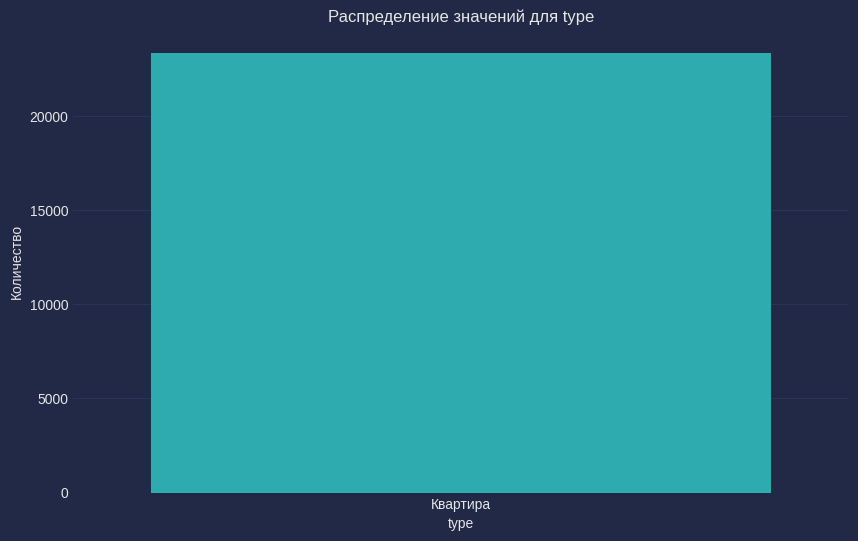

In [64]:
plot_bar_chart(df, 'type')

##### Здесь всего одно значение - **квартира**

### Посмотрим признак 'building'

/tmp/ipykernel_22885/3740251207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floor'] = [int(i.split('/')[0]) for i in df['building']]


<Axes: xlabel='floor', ylabel='Count'>

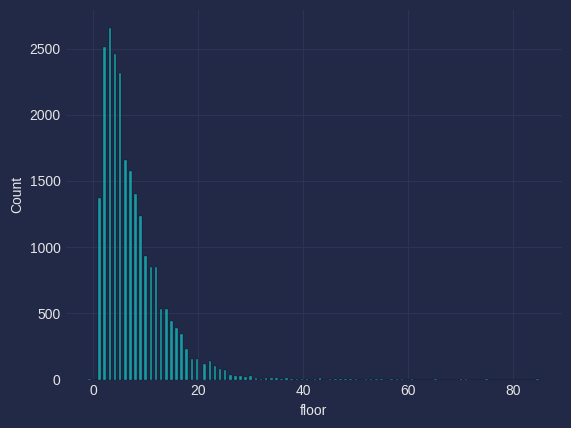

In [79]:
# Создадим столбец 'floor', где будет этаж
df['floor'] = [int(i.split('/')[0]) for i in df['building']]
sns.histplot(df['floor'])

##### Большинство квартир находится на высоте от 1 до 15 этажа

/tmp/ipykernel_22885/1591392349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buildind_floor'] = [int(i.split('/')[1].split(',')[0]) for i in df['building']]


<Axes: xlabel='buildind_floor', ylabel='Count'>

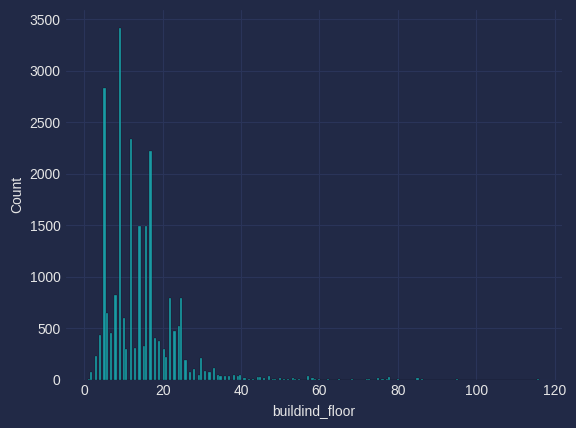

In [80]:
# Создадим столбец 'building_floor', где будет этажность самого здания
df['buildind_floor'] = [int(i.split('/')[1].split(',')[0]) for i in df['building']]
sns.histplot(df['buildind_floor'])

##### Большинство домов высотой - 9, 5, 12, 17, 16 скорее всего это так называемые **панельки** и **сталинки**

/tmp/ipykernel_22885/2176922452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['building_type'] = [i.split(', ')[-1] if len(i.split(', ')[-1]) > 6 else 'Загадка' for i in df['building']]
/tmp/ipykernel_22885/2176922452.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['building_type'].unique(), rotation=90);


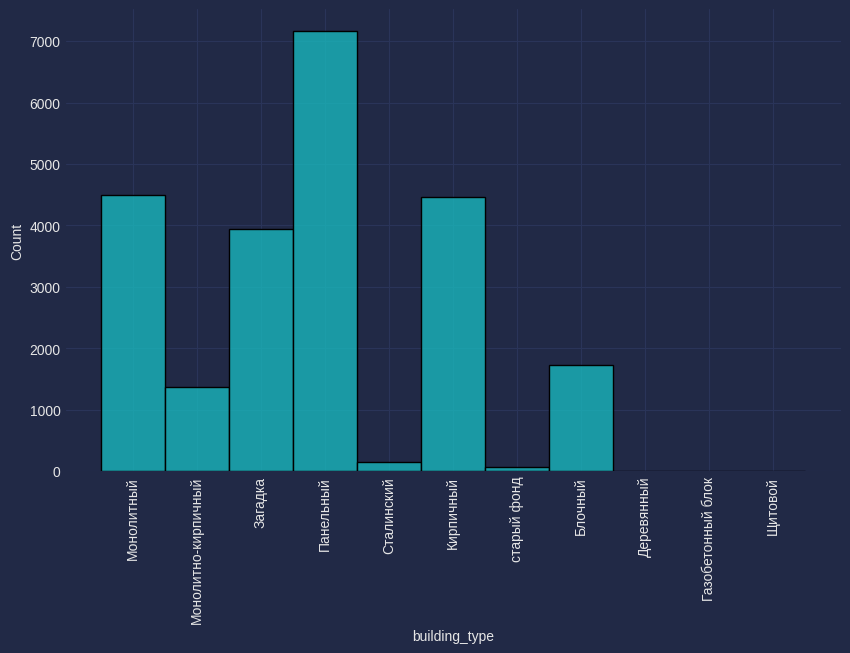

In [89]:
# Создадим столбец 'building_type', где будет тип постройки, если там пропуск - пусть там будет "Загадка"
df['building_type'] = [i.split(', ')[-1] if len(i.split(', ')[-1]) > 6 else 'Загадка' for i in df['building']]


fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['building_type'], ax=ax);
ax.set_xticklabels(df['building_type'].unique(), rotation=90);



##### Больше всего **панелек**, **монолитных** и **кирпичных строений**

## Посмотрим признак цена

/tmp/ipykernel_22885/2667444271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_month'] = [int(i.split('.')[0]) for i in df['price']]


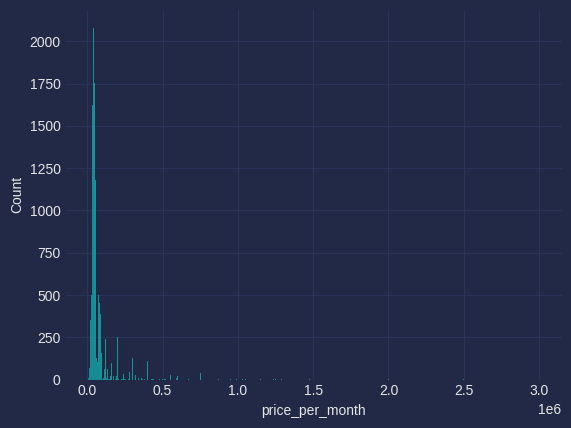

In [91]:
# создадим колонку 'price_per_month' в которой будет отображена стоимость месячной аренды
df['price_per_month'] = [int(i.split('.')[0]) for i in df['price']]
sns.histplot(df['price_per_month']);

In [93]:
df.describe()

,announcement_id,all_square,floor,buildind_floor,price_per_month
count,2.336800e+04,23368.000000,23368.000000,23368.000000,2.336800e+04
mean,2.676265e+08,62.819425,7.356128,14.112162,8.289414e+04
std,1.876862e+07,46.699425,5.845152,8.811694,1.226962e+05
min,1.072986e+08,7.000000,-1.000000,1.000000,5.000000e+03
25%,2.712663e+08,38.000000,3.000000,9.000000,3.700000e+04
50%,2.739030e+08,48.000000,6.000000,12.000000,4.950000e+04
75%,2.746872e+08,70.000000,10.000000,17.000000,7.500000e+04
max,2.750064e+08,811.000000,85.000000,116.000000,3.000000e+06


#### Видим, что минимальная цена аренды 5000 - это либо комната, либо цена в валюте, надо разбираться

<Axes: xlabel='all_square', ylabel='price_per_month'>

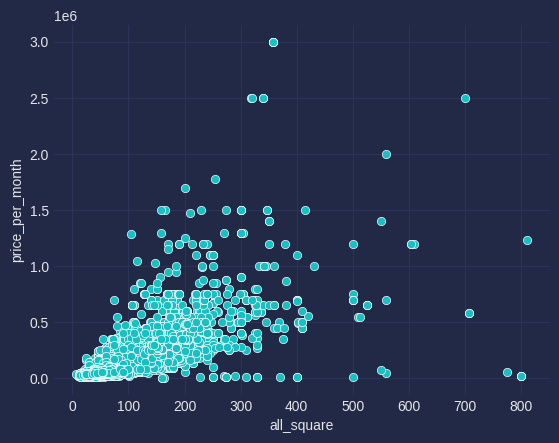

In [94]:
sns.scatterplot(x = df['all_square'], y=df['price_per_month'])


/tmp/ipykernel_22885/3966745603.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['building_type'].unique(), rotation=90);


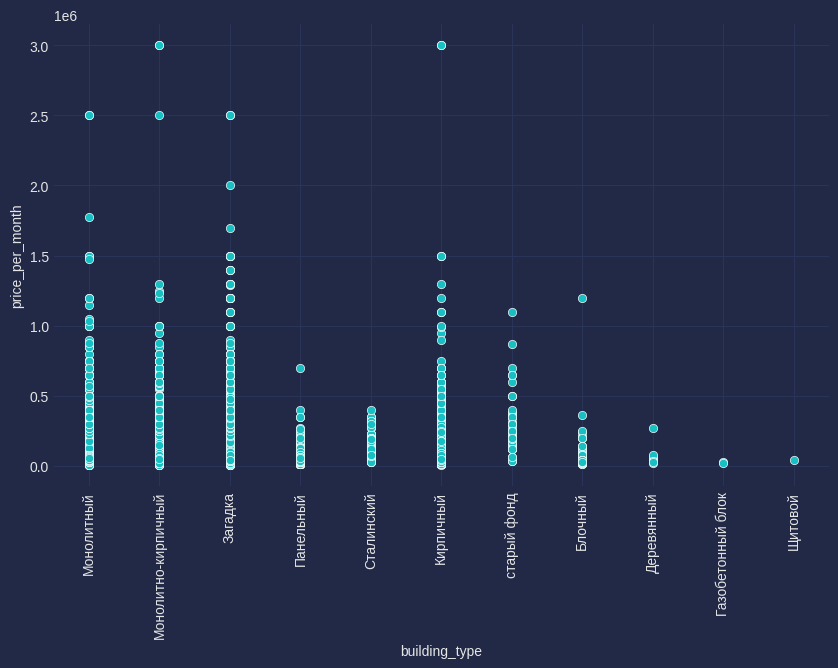

In [96]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = df['building_type'], y=df['price_per_month'], ax=ax)
ax.set_xticklabels(df['building_type'].unique(), rotation=90);

<Axes: >

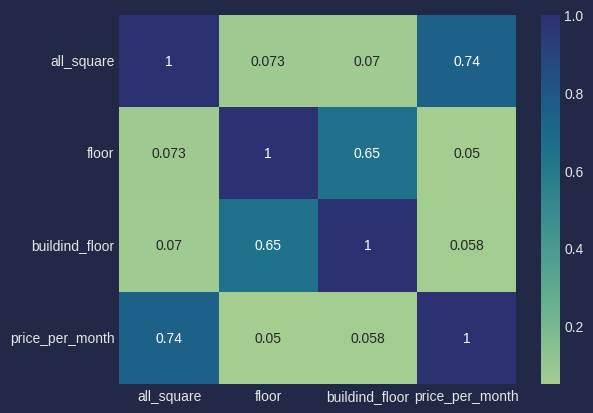

In [103]:
df_corr = df[['all_square', 'floor', 'buildind_floor', 'price_per_month']].corr()

sns.heatmap(df_corr, cmap="crest", annot=True)

##### Видим достаточно сильную корреляцию между ценой и общей площадью

# Небольшой общий вывод:  На первый взгялд данные распределены более менее нормально, с левыми пиками. Выбросы есть, с ними надо будет работать